In [2]:
#Importing Librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('housing.csv')

In [4]:
dataset.shape

(20640, 10)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
dataset.head(n = 10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
dataset['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
dataset.isna().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
columns = dataset.columns
print(type(columns))
columns = list(columns)
print(type(columns))

<class 'pandas.core.indexes.base.Index'>
<class 'list'>


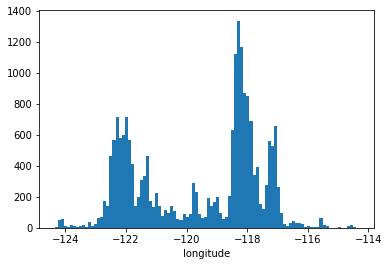

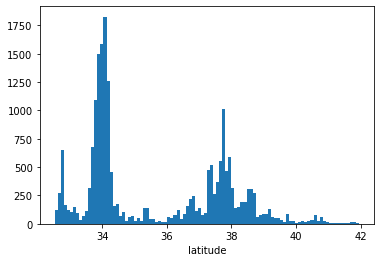

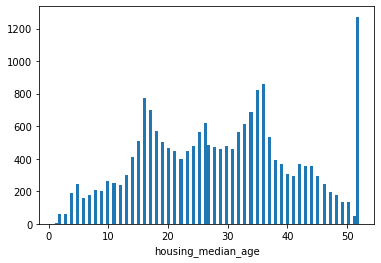

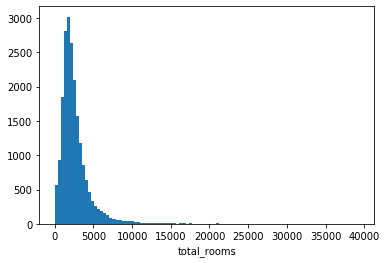

C:\Users\SINCHANA\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\SINCHANA\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


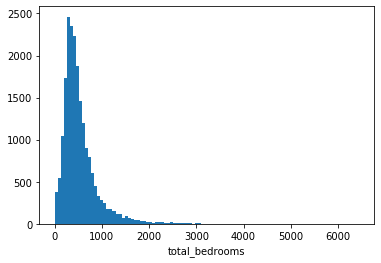

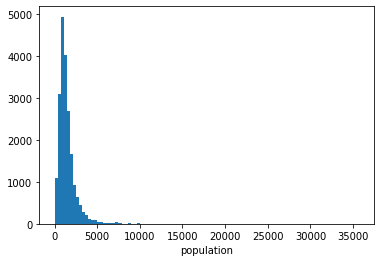

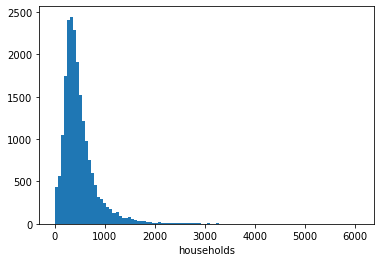

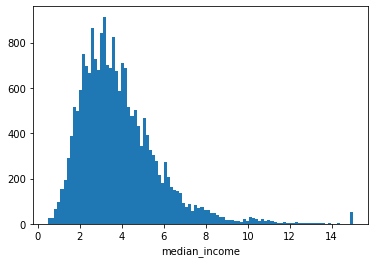

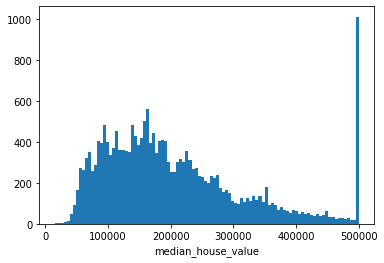

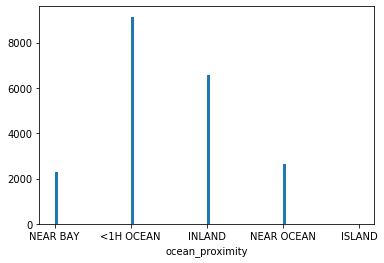

In [12]:
# Visulizing the data
for column in columns:
    plt.hist(dataset[column], bins = 100)
    plt.xlabel(column)
    plt.show()
    

In [13]:
dataset.corr()["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

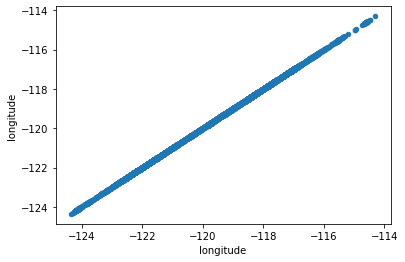

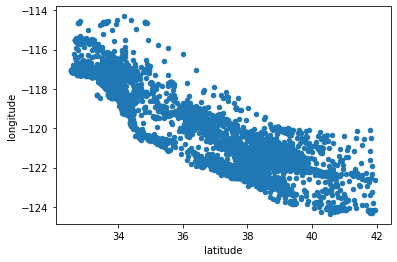

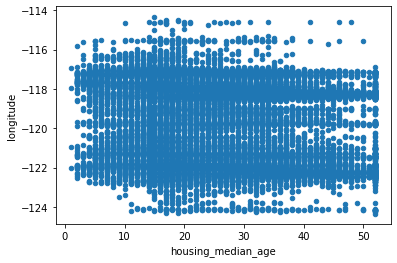

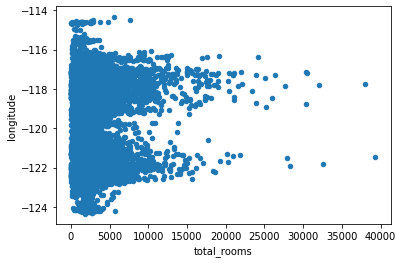

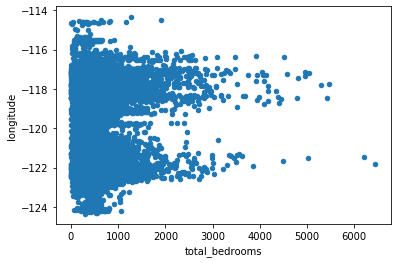

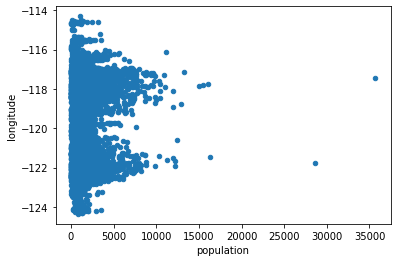

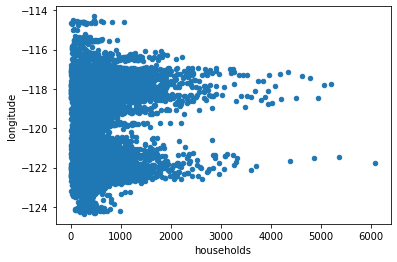

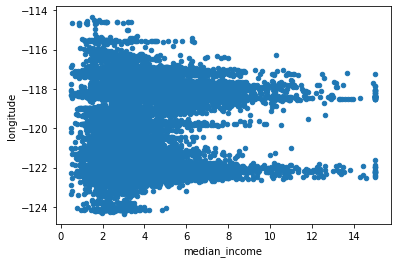

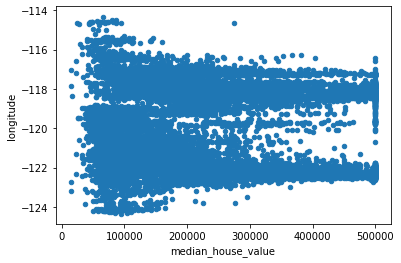

In [14]:
for column in columns:
    if column == 'ocean_proximity':
        break
    else:
        dataset.plot(kind = "scatter", x = column, y = 'longitude')
    

# Data Cleaning

In [15]:
dataset['total_bedrooms'].median()

435.0

In [16]:
dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].median(), inplace = True)

In [17]:
dataset.drop('longitude', axis = 1, inplace = True)

In [18]:
dataset.drop('latitude', axis = 1, inplace = True)

In [19]:
dataset.head(n = 10)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [20]:
 x = dataset.drop('median_house_value', axis = 1)

In [21]:
y = dataset['median_house_value']

In [22]:
print(x.shape)
print(y.shape)

(20640, 7)
(20640,)


In [23]:
x.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [24]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [25]:
df = pd.get_dummies(x['ocean_proximity'], drop_first = True)

In [26]:
df

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
20635,1,0,0,0
20636,1,0,0,0
20637,1,0,0,0
20638,1,0,0,0


In [27]:
x.drop('ocean_proximity', axis = 1, inplace = True)

In [28]:
x.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462


In [29]:
x = pd.concat([x, df], axis = 1)

In [30]:
x.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [83]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [34]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_pred = model.predict(x_train)

In [68]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


69600.0346487593

# Looks like model is under fitting, lets use better algorithm

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
model1 = DecisionTreeRegressor()

In [64]:
model1.fit(x_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [66]:
y_pred1 = model1.predict(x_train)
lin_mse1 = mean_squared_error(y_train, y_pred1)
lin_rmse1 = np.sqrt(lin_mse1)
lin_rmse1


0.0

# Using K Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score

In [71]:
score = cross_val_score(model1, x_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [72]:
rmse_score = np.sqrt(-score)

In [73]:
rmse_score

array([86465.63105605, 87236.03888693, 82648.97912119, 83754.86945342,
       87856.0000977 , 84653.32056633, 82153.15105426, 80751.46731006,
       86634.06107246, 84505.1742945 ])

In [74]:
rmse_score.mean()

84665.86929128967

In [75]:
rmse_score.std()

2246.2339689879364

In [79]:
model.intercept_

24244.45670381753

In [80]:
 from inspect import getsource

In [86]:
getsource(sklearn.linear_model.LinearRgression)

NameError: name 'sklearn' is not defined